# 01 - PyTorch datasets and transforms

These tutorials are inspired by the book "[Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)" by Stevens et al and can be seen as a summary of the part I of the book regarding PyTorch itself. Normally, following the tutorials should be enough and reading the book is not required.

## Contents

1. The CIFAR Dataset   
    1. Loading the CIFAR dataset in Pytorch  
    2. Getting started with the CIFAR dataset  
    3. Plot images  
    4. Count how many samples there are for each class
2. Transforms  
    1. Convert an image into a PyTorch-friendly object  
    2. Include the preprocessing step (transform operator) when loading the dataset  
    3. Normalizing the dataset  

  


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from collections import Counter
from torch.utils.data import random_split

torch.manual_seed(123)

## 1. The CIFAR Dataset

From [Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf):

> CIFAR-10 consists of 60,000 tiny 32 × 32 color (RGB) images, labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9). Nowadays, CIFAR-10 is considered too simple for developing or validating new research, but it serves our learning purposes just fine.

CIFAR is one of the datasets available in PyTorch (see [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html#torchvision-datasets)):

> All datasets are subclasses of [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) [...] Hence, they can all be passed to a [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which can load multiple samples parallelly

These might make things even more confusing first but we will see in this notebook that manipulating PyTorch datasets is actually really simple

### 1.1 Loading the CIFAR dataset in Pytorch

In [2]:
# Where to find the data or where to download the data if not found
data_path = '../data/'

# Instantiates a dataset for the training (and validation) and downloads the data if it is not present
cifar10_train_val = datasets.CIFAR10(
    data_path,       # location from which the data will be downloaded
    train=True,      # says whether we’re interested in the training set or the test set
    download=True,   # says whether we allow PyTorch to download the data if not found in 'data_path'
    )

# Same with test dataset
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True) 

Files already downloaded and verified
Files already downloaded and verified


#### Splitting our training dataset into training/validation datasets

In machine learning we usually split our dataset into 3 datasets:
- Training data: to train the models
- Validation data: to select the best model and (hyper)parameters
- Test data: to estimate the performance of the selected model on unseen data (DO NOT touch this data until you have a fixed model and hyperparameters)

To obtain our validation data we then have to split ```cifar10_train_val``` once more. To do so, we can use [torch.utils.data.random_split()](https://pytorch.org/docs/stable/data.html?highlight=random_split#torch.utils.data.random_split).

In [3]:
# 0.90/0.1 split
n_train = int(len(cifar10_train_val)*0.90)
n_val =  len(cifar10_train_val) - n_train

# Split the datasets
# and give a seed so that we all get the same split
cifar10_train, cifar10_val = random_split(
        cifar10_train_val, 
        [n_train, n_val],
        generator=torch.Generator().manual_seed(123)
)

print("Size of the train dataset:        ", len(cifar10_train))
print("Size of the validation dataset:   ", len(cifar10_val))
print("Size of the test dataset:         ", len(cifar10_test))


Size of the train dataset:         45000
Size of the validation dataset:    5000
Size of the test dataset:          10000


### 1.2 Getting started with the CIFAR dataset

From now on we will try to answer the following questions:

1. How to access elements of this dataset? 
1. What do these elements look like in python?
1. How to plot images?
1. How to manipulate them in order to feed our neural network with them? 

In [4]:
i = 99
i_elt = cifar10_train[i]
# Type of the ith element of the training dataset: 
print("Type of the ith element in the dataset  :  ", type(i_elt))
print("Tuple length of this element            :  ", len(i_elt))
print("Type of the 1st element of the tuple    :  ", type(i_elt[0]))
print("Type of the 2nd element of the tuple    :  ", type(i_elt[1]))

# The dataset is then made like this "i_img, i_label =  cifar10_train[i]""
print("")
img, label = cifar10_train[i]

Type of the ith element in the dataset  :   <class 'tuple'>
Tuple length of this element            :   2
Type of the 1st element of the tuple    :   <class 'PIL.Image.Image'>
Type of the 2nd element of the tuple    :   <class 'int'>



### 1.3 Plot images

#### Ploting images as numpy arrays or PIL.images

using print(img):  <PIL.Image.Image image mode=RGB size=32x32 at 0x7FB2BA47FC10>
shape of an image:  (32, 32, 3)
some pixel values:  [190 189 191 191 193 198 199 199 202 205 203 203 205 205 206 206 207 208
 207 207 208 208 208 209 209 209 210 210 208 207 205 206]


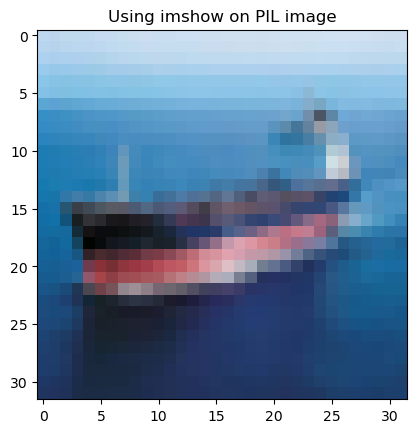

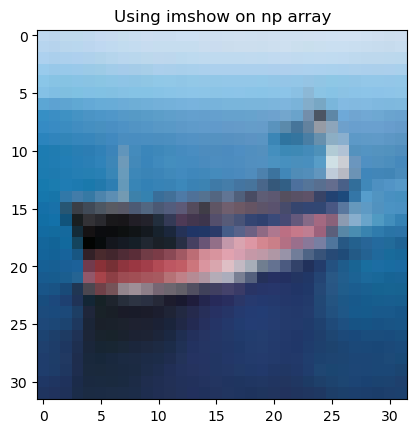

In [5]:
print("using print(img): ", img)  # Print doesn't plot the image nor its elements
img_as_array = np.array(img)  # Convert the image into a numpy array
print("shape of an image: ", img_as_array.shape)    
print("some pixel values: ", img_as_array[0, :, 0])  # Pixel values
#plt.plot(img)      # This gives an error
plt.imshow(img)     # This works :) 
plt.title("Using imshow on PIL image")

plt.figure()
plt.imshow(img_as_array)
plt.title("Using imshow on np array")
plt.show()

#### Plot one instance of each of the 10 classes of images in the CIFAR-10 dataset

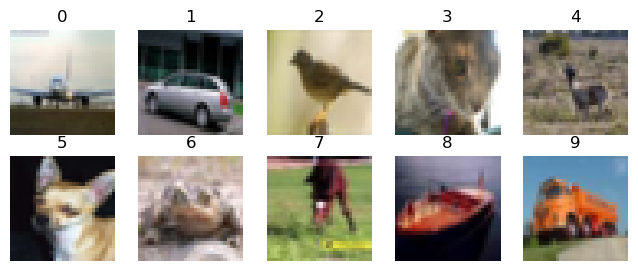

In [6]:
# One fig with 2*5 subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8,3))
for i, ax in enumerate(axes.flat):
    # Find an image in the dataset with the right label
    img = next(img for img, label in cifar10_train if label == i)
    # Plot image
    ax.imshow(img)
    # Add title
    ax.set_title(i)
    # Remove ticks
    ax.axis('off')

plt.show()

#### 1.4 Count how many samples there are for each class

In real life, datasets are not perfect and some problems could come from an imbalanced dataset, that is to say a dataset with an unequal distribution of classes. To check that the dataset does not contain 10 times as many cats as dogs, we can simply count how many samples we have for each class. To do that we can use [collections.Counter()](https://docs.python.org/3/library/collections.html#collections.Counter)

In [7]:
Counter([label for _, label in cifar10_train])

Counter({3: 4504,
         4: 4510,
         2: 4504,
         1: 4471,
         9: 4520,
         8: 4506,
         0: 4513,
         6: 4517,
         7: 4505,
         5: 4450})

## 2. Transforms

### 2.1 Convert an image into a PyTorch-friendly object

Now we know how to plot CIFAR images and how to convert them into numpy arrays. However, the "PyTorch-friendly objects" are not numpy arrays but PyTorch [tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor). This is the counterpart of Numpy's arrays and most of the methods that are available with numpy arrays are also available in Pytorch with tensors. (e.g 
[size](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size), 
[amax](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.amax), 
[argmax](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.argmax), 
[sort](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sort), 
[abs](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.abs), 
[cos](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.cos), 
[sum](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sum) etc.). We can easily transform numpy arrays and PIL images into tensors using the [ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) transform.

Warning: as mentioned in the documentation, this transform implicitly:

1. Reshape a ``(H, W, C)`` image into a ``(C, H, W)`` tensor (Height, Width, Channel (color))
2. Rescale ``[0 255]`` int arrays into ``[0 1]`` float tensors



In [8]:
img_np = np.array(img)
print(type(img_np))
print('Shape of the image as a numpy array  : ', img_np.shape)
# Instanciate a ToTensor transform
to_tensor = transforms.ToTensor()
# Apply it to our PIL image
img_t = to_tensor(img)
print(type(img_t)) 
print('Shape of the image as a tensor       : ', img_t.shape)
print("\n",img_t[0])    # Now values are within [0 1] range

<class 'numpy.ndarray'>
Shape of the image as a numpy array  :  (32, 32, 3)
<class 'torch.Tensor'>
Shape of the image as a tensor       :  torch.Size([3, 32, 32])

 tensor([[0.3373, 0.3333, 0.3373,  ..., 0.4078, 0.4196, 0.4039],
        [0.3490, 0.3451, 0.3412,  ..., 0.4549, 0.4667, 0.4431],
        [0.3529, 0.3529, 0.3490,  ..., 0.4745, 0.5020, 0.4588],
        ...,
        [0.4392, 0.4275, 0.4235,  ..., 0.7294, 0.7098, 0.6706],
        [0.4353, 0.4196, 0.4235,  ..., 0.7451, 0.7333, 0.6902],
        [0.4314, 0.4118, 0.4157,  ..., 0.7137, 0.7137, 0.6941]])


#### Ploting images as tensors

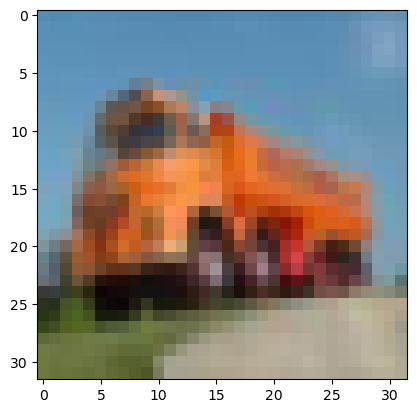

In [9]:
#plt.imshow(img_t)   #Does not work because the shape has changed!
plt.imshow(img_t.permute(1, 2, 0))  # This works :) 

### 2.2 Include the preprocessing step (transform operator) when loading the dataset

We can directly convert the images into tensors when loading a dataset from [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html#torchvision-datasets) as they all have a ``transform`` parameter.

In [10]:
tensor_cifar10_train_val = datasets.CIFAR10(data_path, train=True, download=False,
                                        transform=transforms.ToTensor())
# The images and now stored as tensors and not PIL.Image
print(type(tensor_cifar10_train_val[0][0])) 

<class 'torch.Tensor'>


### 2.3 Normalizing the dataset

In machine learning we almost always do some preprocessing such as normalizing the data before using it as input. 

The [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html#torchvision-transforms) module can easily performs the most common image transformations such as [resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize), [normalize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize), etc. 

In addition, this module allows us to quickly define pipelines of basic preprocessing functions using the [transforms.Compose](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) method.

In [11]:
imgs = torch.stack([img for img, _ in tensor_cifar10_train_val])
print(imgs.shape)
# Instanciate a normalize transform 
# using the mean and standard deviation of our dataset
#
# The shape is '(50000, 3, 32, 32)' and we want the mean/std
# of the three channels (dim = (0, 2, 3))
normalizer = transforms.Normalize(
    imgs.mean(dim=(0, 2, 3)), 
    imgs.std(dim=(0, 2, 3))
    )

torch.Size([50000, 3, 32, 32])


In [12]:
# Load our dataset and apply a composition of transforms
transformed_cifar10_train_val = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        normalizer,
    ]))

transformed_cifar10_test = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        normalizer,
    ]))

That's it! Now our datasets are of the right type and normalized! We can still plot the images but since their pixel values are now normalized they will of course look a bit different. Note that matplotlib understands that the pixels values should be within the ``[0..1]`` range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


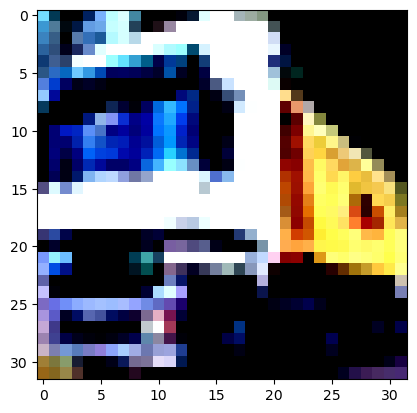

In [13]:
img_t, _ = transformed_cifar10_train_val[1]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()